<a href="https://colab.research.google.com/github/monishkumaar3/Machine-learning-projects/blob/main/unet_water_body.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing instal

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = os.path.join("/content/drive/MyDrive/WATER_BODY/IM" )
mask_path = os.path.join("/content/drive/MyDrive/WATER_BODY/MA")
SIZE=128

In [ ]:
images = os.listdir(image_path)
mask = os.listdir(mask_path)

In [ ]:
print(images)
print(mask)

['I (1).jpg', 'I (10).jpg', 'I (11).jpg', 'I (12).jpg', 'I (13).jpg', 'I (14).jpg', 'I (15).jpg', 'I (16).jpg', 'I (17).jpg', 'I (18).jpg', 'I (19).jpg', 'I (2).jpg', 'I (20).jpg', 'I (21).jpg', 'I (22).jpg', 'I (23).jpg', 'I (24).jpg', 'I (25).jpg', 'I (26).jpg', 'I (27).jpg', 'I (28).jpg', 'I (3).jpg', 'I (29).jpg', 'I (30).jpg', 'I (32).jpg', 'I (31).jpg', 'I (33).jpg', 'I (34).jpg', 'I (35).jpg', 'I (36).jpg', 'I (37).jpg', 'I (38).jpg', 'I (4).jpg', 'I (39).jpg', 'I (40).jpg', 'I (41).jpg', 'I (42).jpg', 'I (43).jpg', 'I (44).jpg', 'I (45).jpg', 'I (5).jpg', 'I (46).jpg', 'I (47).jpg', 'I (48).jpg', 'I (49).jpg', 'I (50).jpg', 'I (51).jpg', 'I (52).jpg', 'I (53).jpg', 'I (54).jpg', 'I (55).jpg', 'I (56).jpg', 'I (6).jpg', 'I (58).jpg', 'I (57).jpg', 'I (59).jpg', 'I (60).jpg', 'I (61).jpg', 'I (63).jpg', 'I (62).jpg', 'I (64).jpg', 'I (7).jpg', 'I (65).jpg', 'I (66).jpg', 'I (67).jpg', 'I (68).jpg', 'I (69).jpg', 'I (70).jpg', 'I (72).jpg', 'I (71).jpg', 'I (73).jpg', 'I (74).jpg'

In [ ]:
print(len(images))

90


In [ ]:
# Here there are total 30 images, please mention number of images for testing and training
no_of_images_for_training=80
no_of_images_for_testing=10

In [ ]:
def getData(X_shape, flag = "test"):
    im_array = []
    mask_array = []
    t=0
    if flag == "test":
        for i in range(90):
            n=i+1
            t1="I"+" "+"("+str(n)+")"+".jpg"
            t2="M"+" "+"("+str(n)+")"+".jpg"
            im = cv2.resize(cv2.imread(os.path.join(image_path,t1)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,t2)),(X_shape,X_shape))[:,:,0]

            im_array.append(im)
            mask_array.append(mask)
            t+=1
            if t==5:
              break


        return im_array,mask_array

    if flag == "train":
        for i in range(90):
            n=i+1
            t1="I"+" "+"("+str(n)+")"+".jpg"
            t2="M"+" "+"("+str(n)+")"+".jpg"
            im = cv2.resize(cv2.imread(os.path.join(image_path,t1)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,t2)),(X_shape,X_shape))[:,:,0]

            im_array.append(im)
            mask_array.append(mask)

        return im_array,mask_array

In [ ]:
dim=256*2
X_train,y_train =getData(dim,flag="train")

In [ ]:
X_test, y_test = getData(dim)

In [ ]:
print(len(X_train),len(y_train))

90 90


In [ ]:
print(len(X_test),len(y_test))

5 5


In [ ]:
def plotMask(X,y):
    num_samples = min(10, len(X), len(y))  # Determine the number of samples to display, up to 10
    sample = []

    for i in range(num_samples):
        left = X[i]
        right = y[i]
        combined = np.hstack((left,right))
        sample.append(combined)


    for i in range(0, min(6, num_samples), 3):  # Adjust the loop range based on available samples

        plt.figure(figsize=(25,10))

        plt.subplot(2,3,1+i)
        plt.imshow(sample[i], cmap='jet')

        if i + 1 < num_samples:
            plt.subplot(2,3,2+i)
            plt.imshow(sample[i+1], cmap='viridis')

        if i + 2 < num_samples:
            plt.subplot(2,3,3+i)
            plt.imshow(sample[i+2], cmap='viridis')

        plt.show()

training set


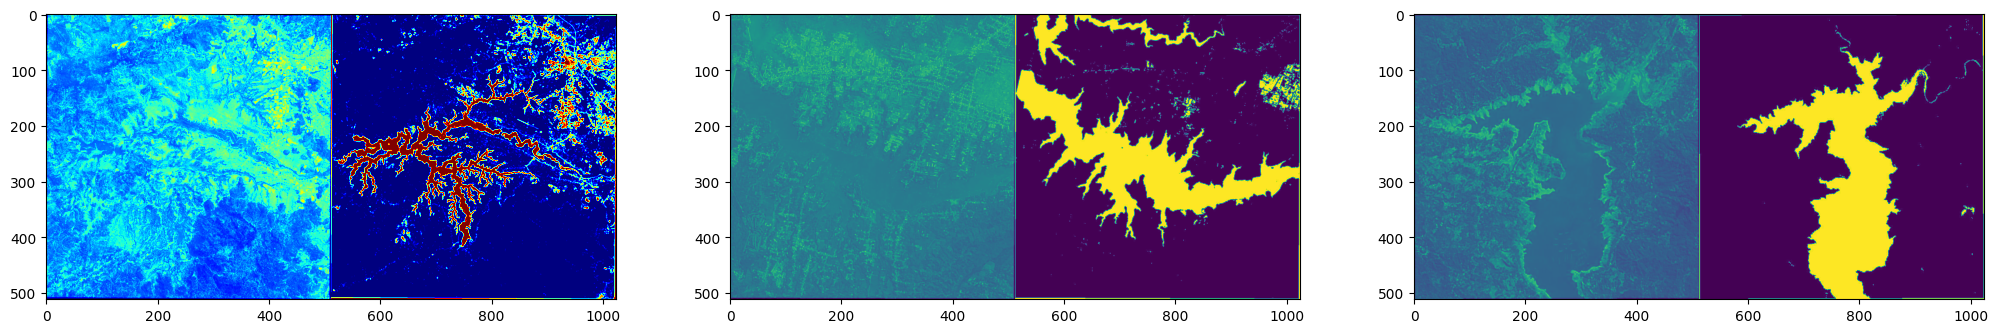

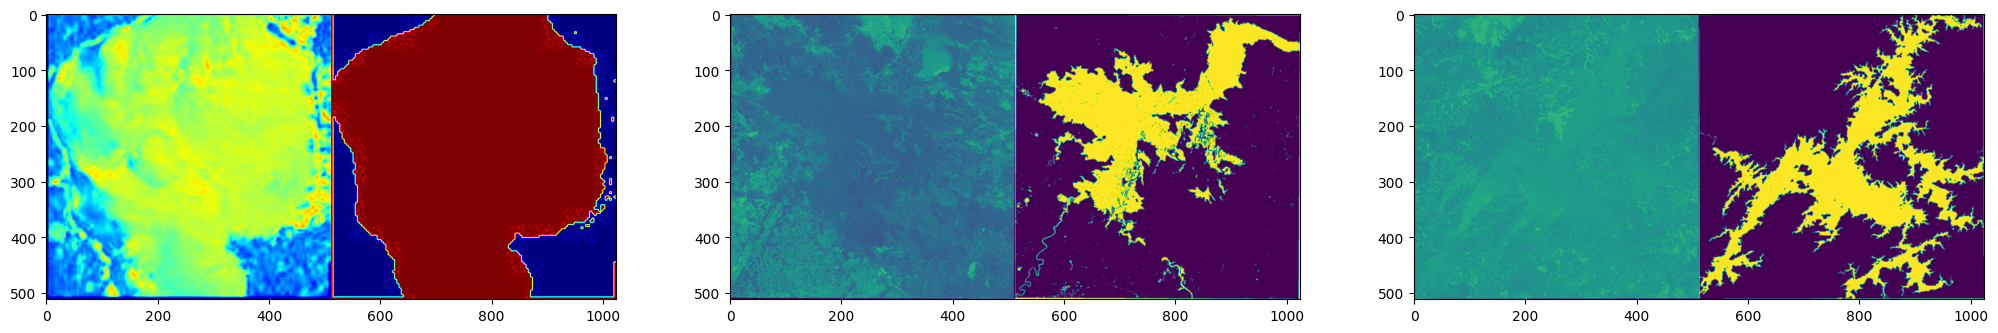

testing set


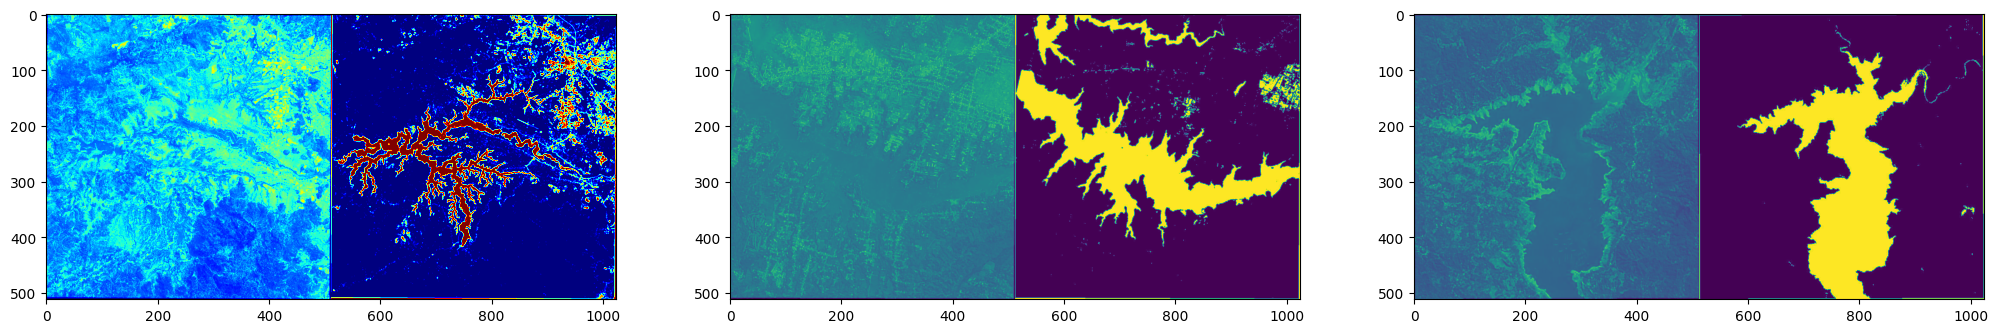

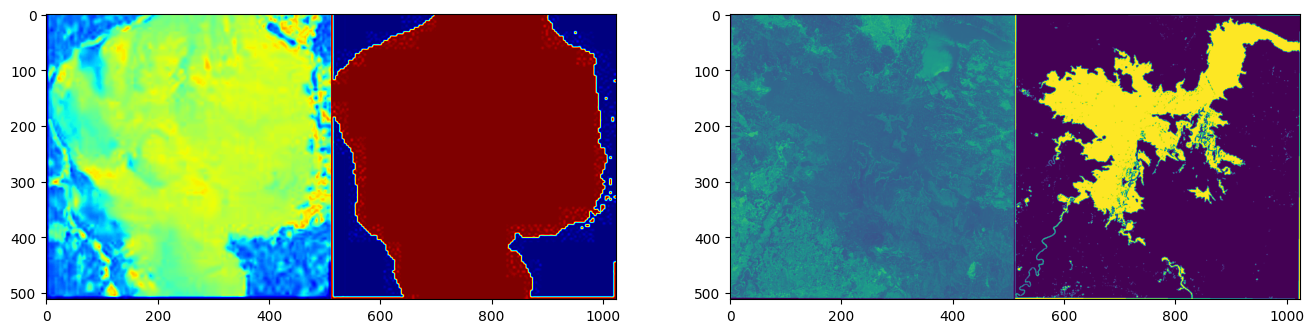

In [ ]:
print("training set")
plotMask(X_train,y_train)
print("testing set")
plotMask(X_test,y_test)

In [ ]:
X_train = np.array(X_train).reshape(len(X_train),dim,dim,1)
y_train = np.array(y_train).reshape(len(y_train),dim,dim,1)
X_test = np.array(X_test).reshape(len(X_test),dim,dim,1)
y_test = np.array(y_test).reshape(len(y_test),dim,dim,1)
assert X_train.shape == y_train.shape
assert X_test.shape == y_test.shape
images = np.concatenate((X_train,X_test),axis=0)
mask  = np.concatenate((y_train,y_test),axis=0)

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def unet(input_size=(224,224,1)):
    inputs = Input(input_size)

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
from tensorflow.keras.optimizers import Adam
model = unet(input_size=(512,512,1))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 32)         320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 256, 256, 32)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                   patience=3,
                                   verbose=1, mode='min', min_delta=0.0001, cooldown=2, min_lr=1e-5)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=15) # probably needs to be more patient
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
from sklearn.model_selection import train_test_split

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=[dice_coef_loss],
           metrics = [dice_coef, 'binary_accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((images-127.0)/127.0,
                                                            (mask>127).astype(np.float32),
                                                            test_size = 0.2,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg,
                                                            test_size = 0.2,
                                                            random_state = 2018)

loss_history = model.fit(x = train_vol,
                       y = train_seg,
                         batch_size = 16,
                  epochs = 1, #keep epochs 5
                  validation_data =(test_vol,test_seg) ,
                  callbacks=callbacks_list)

4/4 [==============================] - ETA: 0s - loss: -0.4520 - dice_coef: 0.4558 - binary_accuracy: 0.5625
Epoch 1: val_loss improved from inf to -0.47315, saving model to cxr_reg_weights.best.hdf5
4/4 [==============================] - 96s 13s/step - loss: -0.4520 - dice_coef: 0.4558 - binary_accuracy: 0.5625 - val_loss: -0.4731 - val_dice_coef: 0.4731 - val_binary_accuracy: 0.4766 - lr: 1.0000e-04


1/1 [==============================] - 0s 36ms/step


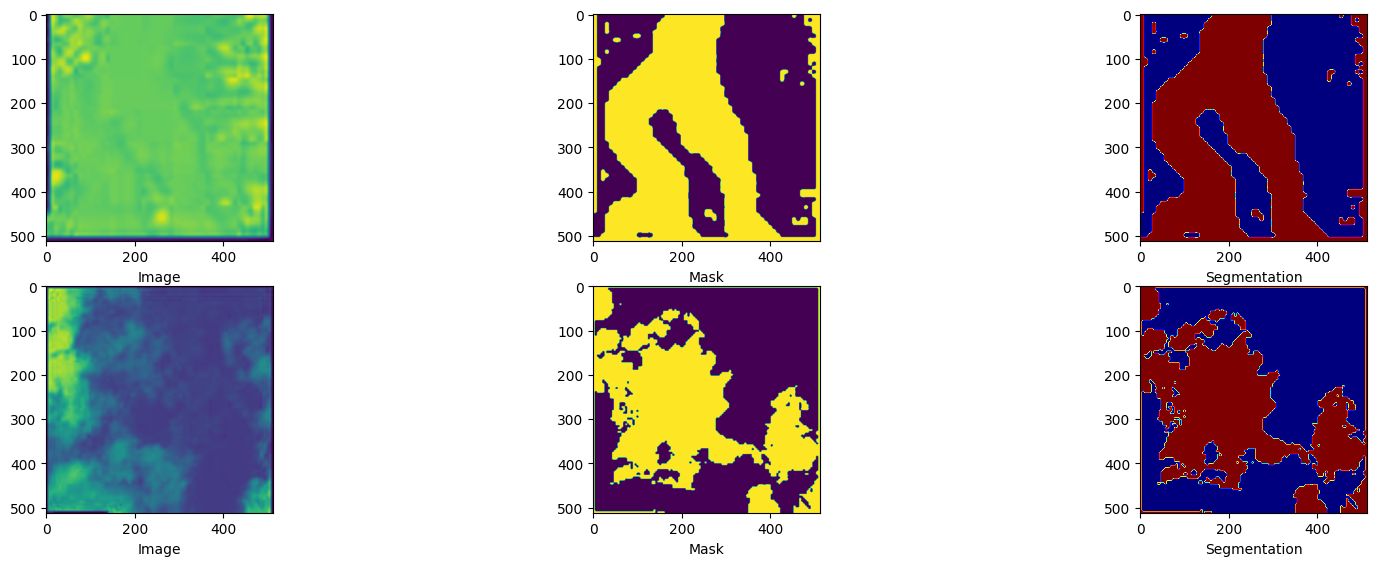

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20,10))

for i in range(0,4,3):
    plt.subplot(3,3,i+1)

    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]), cmap='viridis')
    plt.xlabel("Image")


    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]), cmap='viridis')
    plt.xlabel("Mask")

    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]), cmap='jet')
    plt.xlabel("Segmentation")

plt.savefig("water_body.png")

